In [13]:
times = {
    "phase07_start_time": 1758049649.236268,
    "phase07_end_time": 1758052242.6307151,
    "phase07_duration": 2593.3944470882416,
    "phase10_start_time": 1758052242.6308541,
    "phase10_end_time": 1758275615.8800824,
    "phase10_duration": 223373.24922823906
}
phase07_duration = times["phase07_end_time"] - times["phase07_start_time"]
phase10_duration = times["phase10_end_time"] - times["phase10_start_time"]

phase07_epochs = 7
phase10_epochs = 7

def format_duration(seconds):
    """Convert seconds to human-readable format."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = int(seconds % 60)
    
    if hours > 0:
        return f"{hours}h {minutes}m {secs}s"
    elif minutes > 0:
        return f"{minutes}m {secs}s"
    else:
        return f"{secs}s"

phase07_time_per_epoch = phase07_duration / phase07_epochs
phase10_time_per_epoch = phase10_duration / phase10_epochs

print(f"Phase 07 duration: {format_duration(phase07_duration)} (raw: {phase07_duration:,.2f} seconds), time per epoch: {format_duration(phase07_time_per_epoch)} (raw: {phase07_time_per_epoch:,.2f} seconds)")
print(f"Phase 10 duration: {format_duration(phase10_duration)} (raw: {phase10_duration:,.2f} seconds), time per epoch: {format_duration(phase10_time_per_epoch)} (raw: {phase10_time_per_epoch:,.2f} seconds)")


Phase 07 duration: 43m 13s (raw: 2,593.39 seconds), time per epoch: 6m 10s (raw: 370.48 seconds)
Phase 10 duration: 62h 2m 53s (raw: 223,373.25 seconds), time per epoch: 8h 51m 50s (raw: 31,910.46 seconds)


In [1]:
import datasets

ds = datasets.load_dataset("json", data_files="/mnt/7TB-a/datasets/knowledge/BMO/evaluation/evaluation/bmo_stactic_eval.jsonl", split="train")

ds

/mnt/7TB-a/osilkin/dev-repos/training_hub/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 49 examples [00:00, 7645.87 examples/s]


Dataset({
    features: ['question', 'reference', 'agent_rag_granite', 'problem', 'unique_id'],
    num_rows: 49
})

In [2]:
ds[0]

{'question': 'what is the meaning of verifying the identity of a person or an entity  ',
 'reference': 'It means to use methods to ensure that the information in an identification document or from other informational sources matches the information that the person or entity provided.',
 'agent_rag_granite': "<|user|>Document:\nHeader_2: 1. Meaning of verifying the identity of a person or an entity\n\n1. Meaning of verifying the identity of a person or an entity\n\nIt means to use the methods described in this guidance to ensure that the information in an identification document or from other informational sources matches the information that the person or entity provided.\n\nVerifying identity is a foundational element of Canada's anti-money laundering and anti-terrorist financing regime and a key component of an RE's relationship with clients. It helps you to know your clients and to understand and assess any risk that may be associated to their transactions or activities.\n\nHeader_2

In [7]:
!ls -al /mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_140115/

total 7080
drwxr-xr-x. 16 oleg oleg    4096 Sep 30 14:42 .
drwxr-xr-x.  3 oleg oleg    4096 Sep 30 14:01 ..
-rw-r--r--.  1 oleg oleg   19656 Sep 30 14:42 evaluation.log
-rw-r--r--.  1 oleg oleg    7631 Sep 30 14:42 final_results_summary.json
-rw-r--r--.  1 oleg oleg  368286 Sep 30 14:02 new_bmo-v2_samples_1146.0_responses.jsonl
drwxr-xr-x.  2 oleg oleg    4096 Sep 30 14:03 new_bmo-v2_samples_1146.0_scores
-rw-r--r--.  1 oleg oleg  680636 Sep 30 14:05 new_bmo-v2_samples_2292.0_responses.jsonl
drwxr-xr-x.  2 oleg oleg    4096 Sep 30 14:06 new_bmo-v2_samples_2292.0_scores
-rw-r--r--.  1 oleg oleg  635000 Sep 30 14:08 new_bmo-v2_samples_3438.0_responses.jsonl
drwxr-xr-x.  2 oleg oleg    4096 Sep 30 14:09 new_bmo-v2_samples_3438.0_scores
-rw-r--r--.  1 oleg oleg 1062559 Sep 30 14:11 new_bmo-v2_samples_4584.0_responses.jsonl
drwxr-xr-x.  2 oleg oleg    4096 Sep 30 14:14 new_bmo-v2_samples_4584.0_scores
-rw-r--r--.  1 oleg oleg  921112 Sep 30 14:16 new_bmo-v2_samples_5730.0_responses.jsonl
dr

/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_140115/new_bmo-v2_samples_3438.0_scores/eval_results_new_bmo-v2_samples_3438.0_responses.jsonl.json
207.0
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_140115/old_bmo-v2_samples_21712.0_scores/eval_results_old_bmo-v2_samples_21712.0_responses.jsonl.json
190.0
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_140115/new_bmo-v2_samples_2292.0_scores/eval_results_new_bmo-v2_samples_2292.0_responses.jsonl.json
212.0
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_140115/new_bmo-v2_samples_8022.0_scores/eval_results_new_bmo-v2_samples_8022.0_responses.jsonl.json
209.0
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_140115/new_bmo-v2_samples_4584.0_scores/eval_results_new_bmo-v2_samples_4584.0_responses.jsonl.json
211.0
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_202

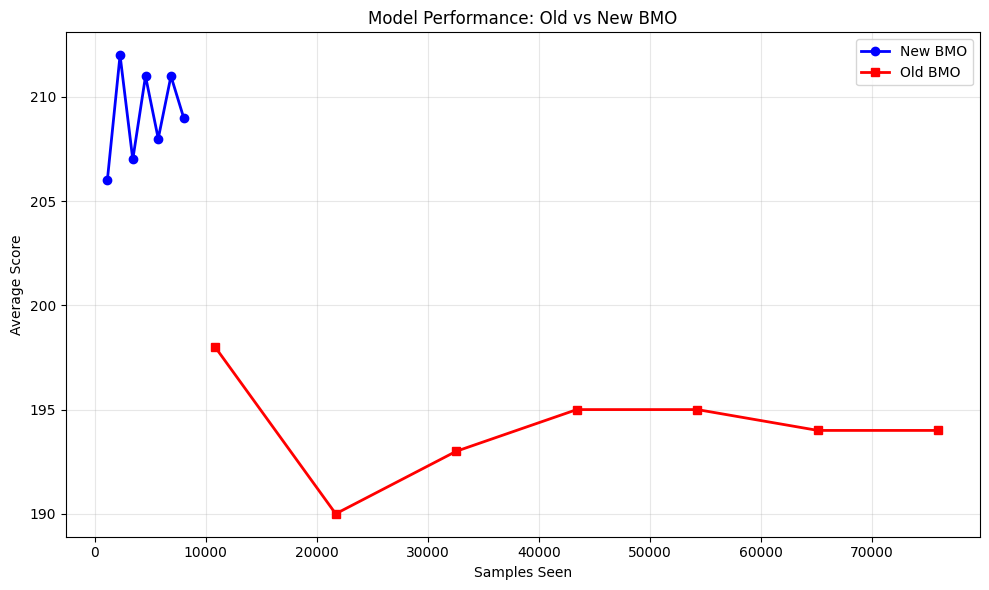

In [41]:
import matplotlib.pyplot as plt
import json
import os
import glob

i = 0
scores = {
    'new_bmo': [],
    'old_bmo': []
}
for file in glob.glob("/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_140115/*_scores/*.json"):
    print(file)
    i += 1
    results = json.load(open(file))
    print(results['average_score'])

    # extrtact the samples seen in the file
    file_pieces = file.split('/')[-2].split('_')
    new = file_pieces[0] == 'new'
    samples_seen = int(float(file_pieces[-2]))
    
    if new:
        scores['new_bmo'].append((results['average_score'], samples_seen))
    else:
        scores['old_bmo'].append((results['average_score'], samples_seen))


# sort the scores by samples seen for proper plotting
scores['new_bmo'].sort(key=lambda x: x[1])
scores['old_bmo'].sort(key=lambda x: x[1])
        
# extract scores and samples for plotting
new_scores, new_samples = zip(*scores['new_bmo']) if scores['new_bmo'] else ([], [])
old_scores, old_samples = zip(*scores['old_bmo']) if scores['old_bmo'] else ([], [])
        
# create the plot
plt.figure(figsize=(10, 6))
plt.plot(new_samples, new_scores, 'o-', label='New BMO', color='blue', linewidth=2, markersize=6)
plt.plot(old_samples, old_scores, 's-', label='Old BMO', color='red', linewidth=2, markersize=6)
        
plt.xlabel('Samples Seen')
plt.ylabel('Average Score')
plt.title('Model Performance: Old vs New BMO')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/old_bmo-v2_samples_65136.0_memory_scores/eval_results_old_bmo-v2_samples_65136.0_memory_responses.jsonl.json
['old', 'bmo-v2', 'samples', '65136.0', 'memory', 'scores']
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/new_bmo-v2_samples_1146.0_memory_scores/eval_results_new_bmo-v2_samples_1146.0_memory_responses.jsonl.json
['new', 'bmo-v2', 'samples', '1146.0', 'memory', 'scores']
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/old_bmo-v2_samples_21712.0_memory_scores/eval_results_old_bmo-v2_samples_21712.0_memory_responses.jsonl.json
['old', 'bmo-v2', 'samples', '21712.0', 'memory', 'scores']
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/new_bmo-v2_samples_8022.0_memory_scores/eval_results_new_bmo-v2_samples_8022.0_memory_respon

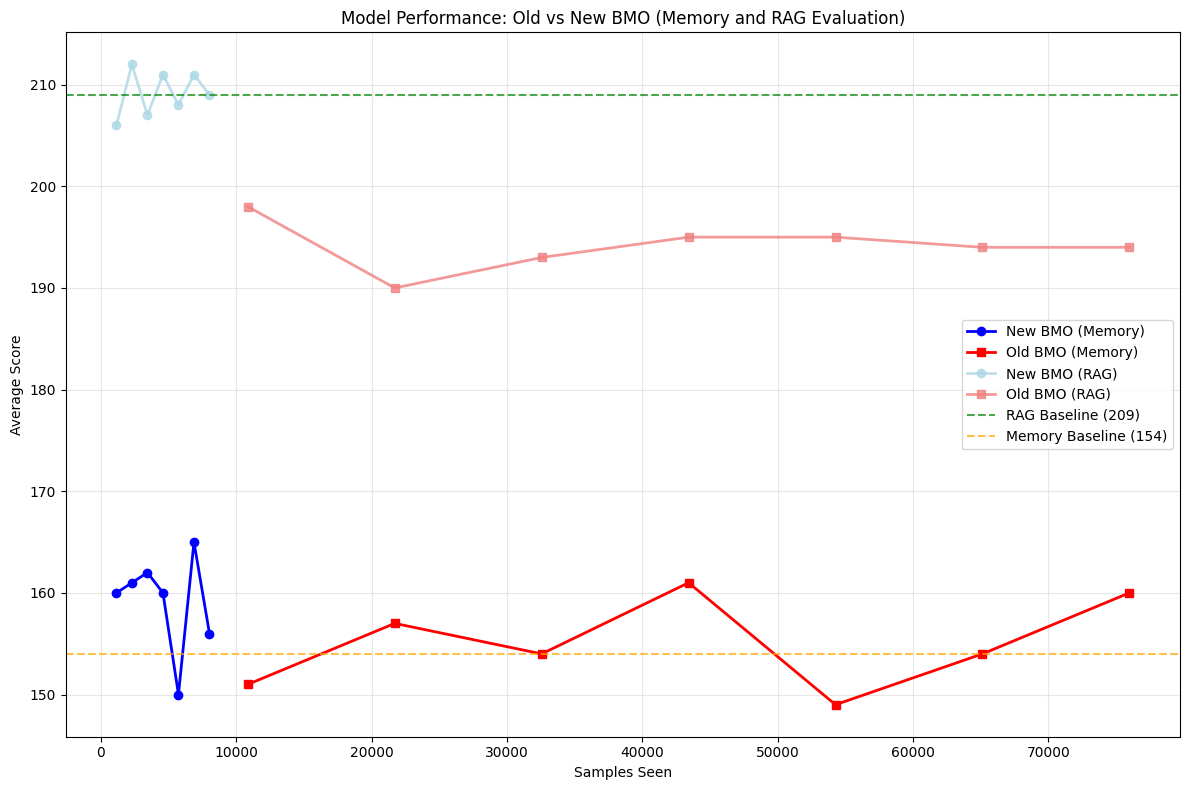

In [46]:
import matplotlib.pyplot as plt
import json
import os
import glob

i = 0
memory_scores = {
    'new_bmo': [],
    'old_bmo': []
}
for file in glob.glob("/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/*_scores/*"):
    print(file)
    i += 1
    results = json.load(open(file))
#     print(results['average_score'])

#     # extrtact the samples seen in the file
    file_pieces = file.split('/')[-2].split('_')
    print(file_pieces)
    new = file_pieces[0] == 'new'
    samples_seen = int(float(file_pieces[-3]))
    
    if new:
        memory_scores['new_bmo'].append((results['average_score'], samples_seen))
    else:
        memory_scores['old_bmo'].append((results['average_score'], samples_seen))


# sort the scores by samples seen for proper plotting
memory_scores['new_bmo'].sort(key=lambda x: x[1])
memory_scores['old_bmo'].sort(key=lambda x: x[1])
        
# extract scores and samples for plotting
memory_new_scores, memory_new_samples = zip(*memory_scores['new_bmo']) if memory_scores['new_bmo'] else ([], [])
memory_old_scores, memory_old_samples = zip(*memory_scores['old_bmo']) if memory_scores['old_bmo'] else ([], [])

# extract rag scores from the previous cell
rag_new_scores, rag_new_samples = zip(*scores['new_bmo']) if scores['new_bmo'] else ([], [])
rag_old_scores, rag_old_samples = zip(*scores['old_bmo']) if scores['old_bmo'] else ([], [])
        
# create the plot
plt.figure(figsize=(12, 8))

# plot memory scores
plt.plot(memory_new_samples, memory_new_scores, 'o-', label='New BMO (Memory)', color='blue', linewidth=2, markersize=6)
plt.plot(memory_old_samples, memory_old_scores, 's-', label='Old BMO (Memory)', color='red', linewidth=2, markersize=6)

# plot rag scores
plt.plot(rag_new_samples, rag_new_scores, 'o-', label='New BMO (RAG)', color='lightblue', linewidth=2, markersize=6, alpha=0.8)
plt.plot(rag_old_samples, rag_old_scores, 's-', label='Old BMO (RAG)', color='lightcoral', linewidth=2, markersize=6, alpha=0.8)

# add baseline horizontal lines for llama-3.1-8b-instruct
plt.axhline(y=209, color='green', linestyle='--', alpha=0.7, label='RAG Baseline (209)')
plt.axhline(y=154, color='orange', linestyle='--', alpha=0.7, label='Memory Baseline (154)')

plt.xlabel('Samples Seen')
plt.ylabel('Average Score')
plt.title('Model Performance: Old vs New BMO (Memory and RAG Evaluation)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [58]:
# # for memory
# for file in glob.glob("/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/*/memory_results/*_scores/*"):
#     print(file)

# print('--------------------------------')
# # for rag
# for file in glob.glob("/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/*/rag_results/*_scores/*"):
#     print(file)

# print('--------------------------------')

# try this 

i = 0
for file in glob.glob("/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/*/*/*/*.json"):
    print(file)
    i += 1

print(i)


/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/old_bmo-v2_samples_65136.0_memory_scores/eval_results_old_bmo-v2_samples_65136.0_memory_responses.jsonl.json
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/new_bmo-v2_samples_1146.0_memory_scores/eval_results_new_bmo-v2_samples_1146.0_memory_responses.jsonl.json
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/old_bmo-v2_samples_21712.0_memory_scores/eval_results_old_bmo-v2_samples_21712.0_memory_responses.jsonl.json
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/new_bmo-v2_samples_8022.0_memory_scores/eval_results_new_bmo-v2_samples_8022.0_memory_responses.jsonl.json
/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/batch_eval_20250930_155550/memory_results/old_bmo-v2_samples_75992.0_memory_scores/eval_results_old_bmo-v

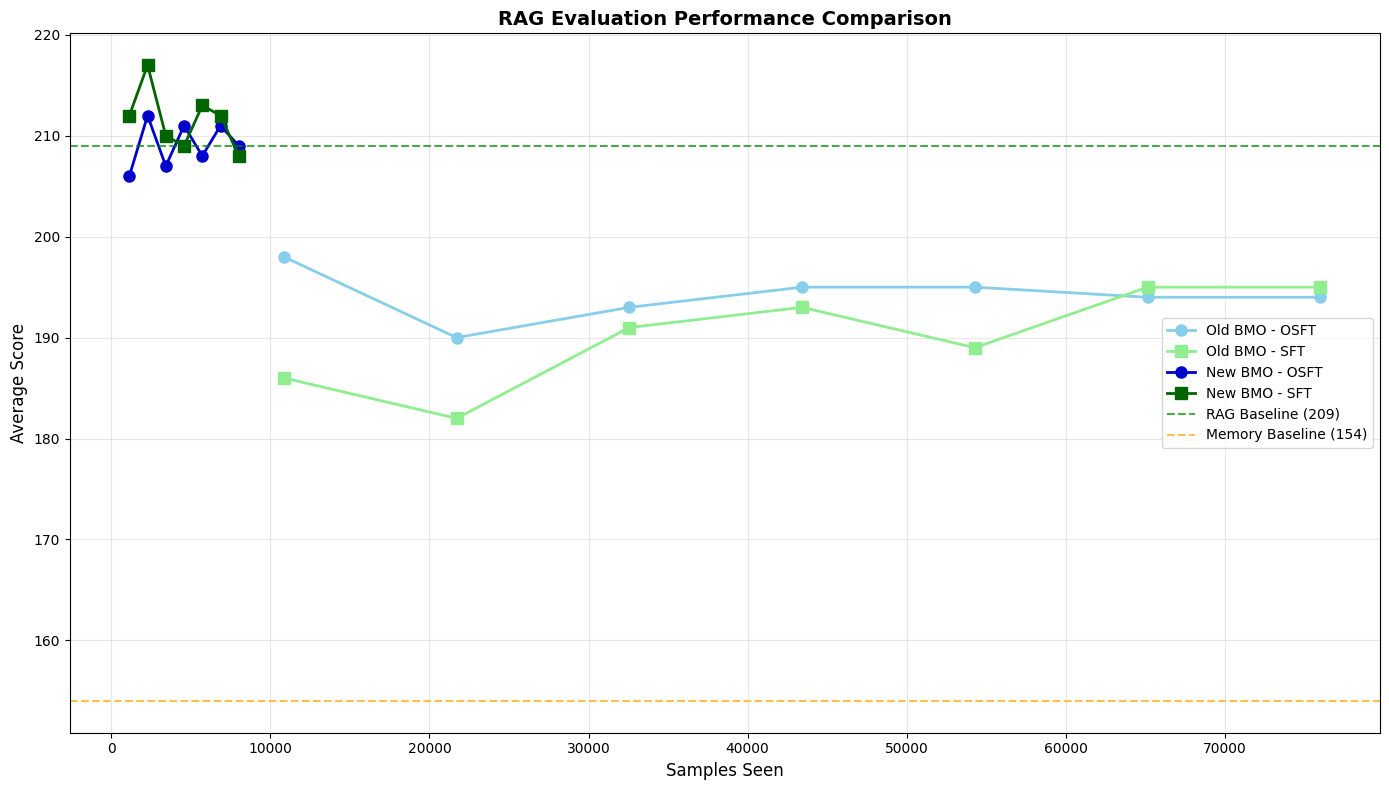

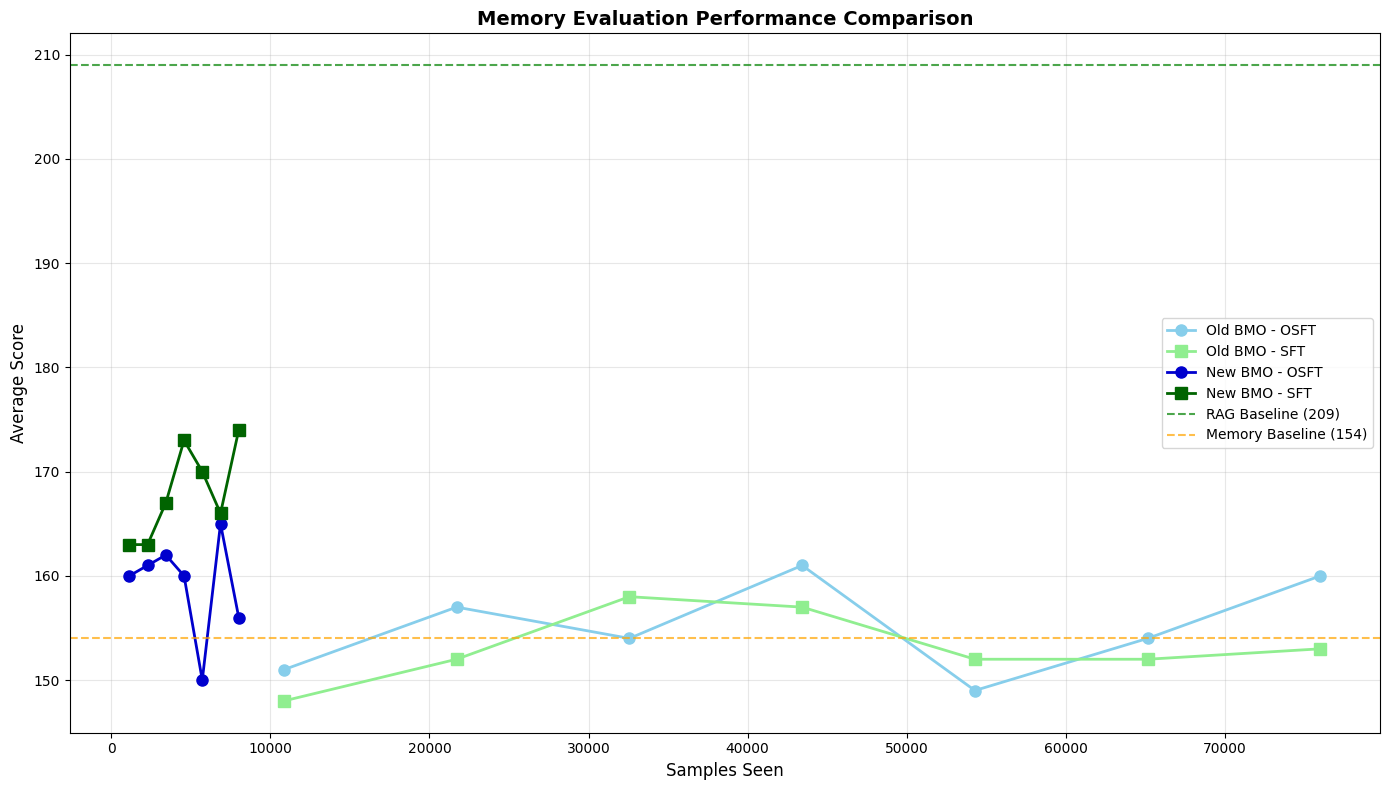


=== Summary Statistics ===


RAG Evaluation:
  Old BMO - OSFT:
    First checkpoint: 198.00
    Last checkpoint: 194.00
    Improvement: -4.00
  Old BMO - SFT:
    First checkpoint: 186.00
    Last checkpoint: 195.00
    Improvement: +9.00
  New BMO - OSFT:
    First checkpoint: 206.00
    Last checkpoint: 209.00
    Improvement: +3.00
  New BMO - SFT:
    First checkpoint: 212.00
    Last checkpoint: 208.00
    Improvement: -4.00

MEMORY Evaluation:
  Old BMO - OSFT:
    First checkpoint: 151.00
    Last checkpoint: 160.00
    Improvement: +9.00
  Old BMO - SFT:
    First checkpoint: 148.00
    Last checkpoint: 153.00
    Improvement: +5.00
  New BMO - OSFT:
    First checkpoint: 160.00
    Last checkpoint: 156.00
    Improvement: -4.00
  New BMO - SFT:
    First checkpoint: 163.00
    Last checkpoint: 174.00
    Improvement: +11.00


In [61]:
import matplotlib.pyplot as plt
import json
import glob
from collections import defaultdict

# data structure to hold all results
# format: results[eval_mode][dataset_version][training_method] = [(samples, score), ...]
results = {
    'rag': defaultdict(lambda: defaultdict(list)),
    'memory': defaultdict(lambda: defaultdict(list))
}

# glob patterns to find all JSON evaluation files
# batch_eval_20250930_140115 has 3 levels, others have 4 levels
patterns = [
    "/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/*/*/*.json",  # 3 levels (OSFT only)
    "/mnt/7TB-a/osilkin/POC-Evaluation/batch_evaluation_results/*/*/*/*.json"  # 4 levels (includes SFT)
]

all_files = []
for pattern in patterns:
    all_files.extend(glob.glob(pattern))

for file_path in all_files:
    # skip summary files
    if 'final_results_summary' in file_path or 'mode_comparison_report' in file_path:
        continue
    
    # extract info from the parent directory name
    # example: new_bmo-v2-sft_samples_1146.0_memory_scores
    dir_name = file_path.split('/')[-2]
    parts = dir_name.split('_')
    
    # determine dataset version (old/new)
    dataset_version = parts[0]  # 'old' or 'new'
    
    # determine training method (OSFT if no '-sft', SFT if '-sft')
    if '-sft' in dir_name:
        training_method = 'SFT'
    else:
        training_method = 'OSFT'
    
    # extract samples seen
    # find the index of 'samples' and get the next element
    samples_idx = parts.index('samples')
    samples_seen = int(float(parts[samples_idx + 1]))
    
    # determine eval mode (rag or memory)
    if 'memory' in dir_name:
        eval_mode = 'memory'
    elif 'rag' in dir_name:
        eval_mode = 'rag'
    else:
        # fallback for batch_eval_20250930_140115 which has neither in dirname
        if 'memory_results' in file_path:
            eval_mode = 'memory'
        else:
            eval_mode = 'rag'
    
    # load the JSON and extract score
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
            score = data.get('average_score', 0)
            
            # store the result
            results[eval_mode][dataset_version][training_method].append((samples_seen, score))
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# sort results by samples seen for proper line plotting
for eval_mode in results:
    for dataset_ver in results[eval_mode]:
        for train_method in results[eval_mode][dataset_ver]:
            results[eval_mode][dataset_ver][train_method].sort(key=lambda x: x[0])

# define color scheme
# OSFT: blue tones, SFT: green tones
# old: lighter, new: darker
colors = {
    ('old', 'OSFT'): '#87CEEB',  # sky blue
    ('new', 'OSFT'): '#0000CD',  # medium blue
    ('old', 'SFT'): '#90EE90',   # light green
    ('new', 'SFT'): '#006400',   # dark green
}

# markers
markers = {
    'OSFT': 'o',
    'SFT': 's'
}

# create RAG plot
plt.figure(figsize=(14, 8))
for dataset_ver in ['old', 'new']:
    for train_method in ['OSFT', 'SFT']:
        if train_method in results['rag'][dataset_ver]:
            data = results['rag'][dataset_ver][train_method]
            if data:
                samples, scores = zip(*data)
                label = f'{dataset_ver.capitalize()} BMO - {train_method}'
                plt.plot(samples, scores, 
                        marker=markers[train_method],
                        color=colors[(dataset_ver, train_method)],
                        linewidth=2,
                        markersize=8,
                        label=label)


# add baseline horizontal lines for llama-3.1-8b-instruct
plt.axhline(y=209, color='green', linestyle='--', alpha=0.7, label='RAG Baseline (209)')
plt.axhline(y=154, color='orange', linestyle='--', alpha=0.7, label='Memory Baseline (154)')

plt.xlabel('Samples Seen', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.title('RAG Evaluation Performance Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# create Memory plot
plt.figure(figsize=(14, 8))
for dataset_ver in ['old', 'new']:
    for train_method in ['OSFT', 'SFT']:
        if train_method in results['memory'][dataset_ver]:
            data = results['memory'][dataset_ver][train_method]
            if data:
                samples, scores = zip(*data)
                label = f'{dataset_ver.capitalize()} BMO - {train_method}'
                plt.plot(samples, scores, 
                        marker=markers[train_method],
                        color=colors[(dataset_ver, train_method)],
                        linewidth=2,
                        markersize=8,
                        label=label)

# add baseline horizontal lines for llama-3.1-8b-instruct
plt.axhline(y=209, color='green', linestyle='--', alpha=0.7, label='RAG Baseline (209)')
plt.axhline(y=154, color='orange', linestyle='--', alpha=0.7, label='Memory Baseline (154)')
plt.xlabel('Samples Seen', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.title('Memory Evaluation Performance Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# print summary statistics
print("\n=== Summary Statistics ===\n")
for eval_mode in ['rag', 'memory']:
    print(f"\n{eval_mode.upper()} Evaluation:")
    for dataset_ver in ['old', 'new']:
        for train_method in ['OSFT', 'SFT']:
            if train_method in results[eval_mode][dataset_ver]:
                data = results[eval_mode][dataset_ver][train_method]
                if data:
                    scores = [s for _, s in data]
                    print(f"  {dataset_ver.capitalize()} BMO - {train_method}:")
                    print(f"    First checkpoint: {scores[0]:.2f}")
                    print(f"    Last checkpoint: {scores[-1]:.2f}")
                    print(f"    Improvement: {scores[-1] - scores[0]:+.2f}")

